# CSC 219 - Final Project
## Image Classification with Fashion-MNIST and CIFAR-10
### Khoi Hoang

# Abstract
There are many different technique and models to solve the problem of image classification.  
It is important for students to fully understand the principles behind each model and its performance based on the dataset.  
The purpose of this project is to gain a deeper understanding of different classification models, and how they perform on the Fashion-MNIST and CIFAR-10 dataset.  

In [1]:
import collections
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn import metrics
from IPython.display import Markdown, display
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Helper function
# Print markdown style
def printmd(string):
    display(Markdown(string))
    
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Fashion-MNIST dataset

The following information is taken from Keras website: https://keras.io/datasets/  
The Fashion-MNIST dataset consists of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.  
The class labels for the data are:

| Label | Description | 
| --- | --- | 
| 0 | T-shirt/Top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle Boot |

In [12]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


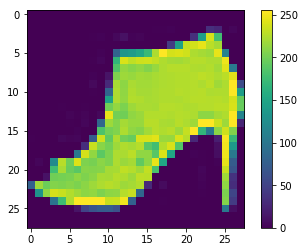

Image (#79): Which is label number '9', or label 'Ankle boot''


In [13]:
labelNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
sample = 79 
each = x_train[sample]

plt.figure()
plt.imshow(each)
plt.colorbar()
plt.show()
print("Image (#{}): Which is label number '{}', or label '{}''".format(sample,y_train[sample], labelNames[y_train[sample]]))

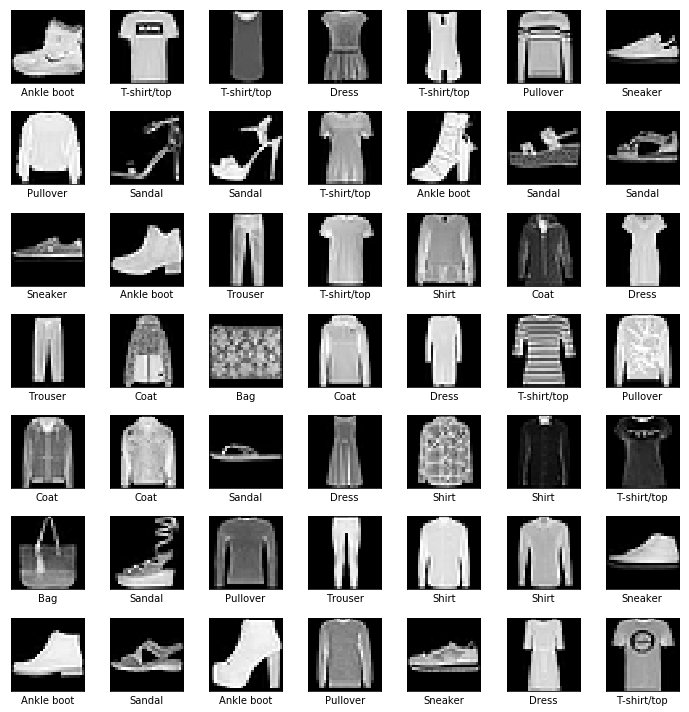

In [64]:
ROW = 7
COLUMN = 7
plt.figure(figsize=(10, 10)) 
for i in range(ROW * COLUMN):
    image = x_train[i] 
    plt.subplot(ROW, COLUMN, i+1)       
    plt.imshow(image, cmap='gray')  
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labelNames[y_train[i]])
    plt.tight_layout()   
    
plt.show()

# CNN model

In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers, regularizers

In [66]:
# reshape the input into 4D array for CNN model
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[1], 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [67]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [68]:
# One hot encode the outcome
num_classes = 10

# Converts a class vector (integers) to binary class matrix.   One-hot encoding!  Use with categorical_crossentropy.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [69]:
y_train.shape

(60000, 10)

In [70]:
checkpointer = ModelCheckpoint(filepath="save/cnn_mnist.hdf5", verbose=0, save_best_only=True) # save best model
input_shape = (28, 28, 1)
weight_decay = 1e-4

#Build network
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay), 
             input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay), 
             input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.34)) 

model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay), 
             input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.36))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')

model.fit(x_train,y_train, validation_data=(x_test,y_test), callbacks=[monitor,checkpointer],verbose=2,epochs=50, batch_size=64, shuffle=True)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
    
print('Training finished...Loading the best model')  
print()
model.load_weights('save/cnn_mnist.hdf5') # load weights from best model

Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
 - 22s - loss: 0.5303 - acc: 0.8381 - val_loss: 0.4066 - val_acc: 0.8817
Epoch 2/1000
 - 20s - loss: 0.3655 - acc: 0.8984 - val_loss: 0.3651 - val_acc: 0.9020
Epoch 3/1000
 - 20s - loss: 0.3391 - acc: 0.9112 - val_loss: 0.3900 - val_acc: 0.8928
Epoch 4/1000
 - 19s - loss: 0.3290 - acc: 0.9163 - val_loss: 0.3607 - val_acc: 0.9047
Epoch 5/1000
 - 20s - loss: 0.3301 - acc: 0.9207 - val_loss: 0.3498 - val_acc: 0.9169
Epoch 6/1000
 - 19s - loss: 0.3260 - acc: 0.9246 - val_loss: 0.3689 - val_acc: 0.9081
Epoch 7/1000
 - 19s - loss: 0.3284 - acc: 0.9272 - val_loss: 0.3735 - val_acc: 0.9171
Epoch 8/1000
 - 19s - loss: 0.3319 - acc: 0.9295 - val_loss: 0.3841 - val_acc: 0.9138
Epoch 9/1000
 - 19s - loss: 0.3317 - acc: 0.9332 - val_loss: 0.3778 - val_acc: 0.9184
Epoch 10/1000
 - 20s - loss: 0.3315 - acc: 0.9352 - val_loss: 0.3775 - val_acc: 0.9235
Epoch 00010: early stopping
Training finished...Loading the best model



In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 14, 14, 128)       73856     
__________

-----------------**Convolutional Neural Network Report**---------------

F1 score: 0.9161150492889818
Confusion matrix: 
 [[898   1  19   4   3   1  66   0   8   0]
 [  1 983   1   6   5   0   4   0   0   0]
 [ 13   1 906   4  40   0  34   0   2   0]
 [ 23   7  13 904  21   0  29   0   2   1]
 [  0   1  45  12 904   0  37   0   1   0]
 [  0   0   0   0   0 977   0  19   0   4]
 [118   2  70  18 104   0 686   0   2   0]
 [  0   0   0   0   0   3   0 991   0   6]
 [  4   0   3   3   0   1   2   4 983   0]
 [  1   0   0   0   0   3   0  59   0 937]]
Plotting confusion matrix


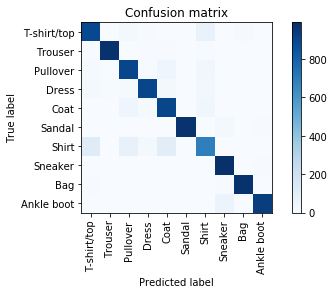

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.91      0.88      1000
           3       0.95      0.90      0.93      1000
           4       0.84      0.90      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.80      0.69      0.74      1000
           7       0.92      0.99      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.94      0.96      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [77]:
cnn_pred_mnist = model.predict(x_test)
cnn_pred_mnist = np.argmax(cnn_pred_mnist,axis=1)
y_true = np.argmax(y_test,axis=1)

cnn_f1_mnist = metrics.f1_score(y_true, cnn_pred_mnist, average= "weighted")
cnn_cm_mnist = metrics.confusion_matrix(y_true, cnn_pred_mnist)
printmd("-----------------**Convolutional Neural Network Report**---------------")
print("F1 score: {}".format(cnn_f1_mnist))
print("Confusion matrix: \n", cnn_cm_mnist)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cnn_cm_mnist, labelNames)
plt.show()

print(metrics.classification_report(y_true, cnn_pred_mnist))

# Classic ML models

* In this section I examine the following classic Machine Learning Models:
    - SVM
    - Logistic Regression
    - KNN
    - Naives Baynes
    - Random Forest
    - Decision Tree

In [14]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [15]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [16]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#svc = SVC(kernel='poly')
#svc.fit(x_train, y_train)

C:\Users\hgdan\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(x_train, y_train)

C:\Users\hgdan\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=70, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

-----------------**Random Forest Report**---------------

F1 score: 0.8620448017146329
Accuracy score: 0.8637
Confusion matrix: 
 [[862   1  14  24   6   1  82   0  10   0]
 [  1 963   3  23   2   0   7   0   1   0]
 [ 15   0 784  13 122   0  61   0   5   0]
 [ 28   6  15 895  32   0  22   0   2   0]
 [  2   1 129  45 772   0  49   0   2   0]
 [  0   0   0   1   0 941   0  36   2  20]
 [176   3 129  27  87   0 561   0  17   0]
 [  0   0   0   0   0  14   0 948   0  38]
 [  5   2   5   3   2   2   9   5 966   1]
 [  0   0   1   0   0   9   0  43   2 945]]
Plotting confusion matrix


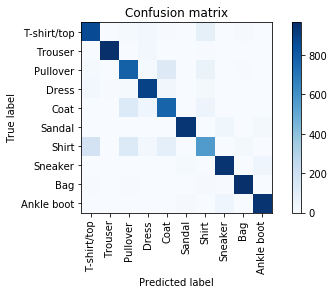

              precision    recall  f1-score   support

           0       0.79      0.86      0.83      1000
           1       0.99      0.96      0.97      1000
           2       0.73      0.78      0.75      1000
           3       0.87      0.90      0.88      1000
           4       0.75      0.77      0.76      1000
           5       0.97      0.94      0.96      1000
           6       0.71      0.56      0.63      1000
           7       0.92      0.95      0.93      1000
           8       0.96      0.97      0.96      1000
           9       0.94      0.94      0.94      1000

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [20]:
y_pred_forest = random_forest.predict(x_test)
random_forest_f1 = metrics.f1_score(y_test, y_pred_forest, average= "weighted")
random_forest_accuracy = metrics.accuracy_score(y_test, y_pred_forest)
random_forest_cm = metrics.confusion_matrix(y_test, y_pred_forest)
printmd("-----------------**Random Forest Report**---------------")
print("F1 score: {}".format(random_forest_f1))
print("Accuracy score: {}".format(random_forest_accuracy))
print("Confusion matrix: \n", random_forest_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(random_forest_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_forest))

# CIFAR-10 dataset

The following information is taken from Keras website: https://keras.io/datasets/  
The CIFAR-10 dataset consists of 50,000 32x32 color training images of 10 categories, along with a test set of 10,000 images.  
The class labels for the data are:

| Label | Description | 
| --- | --- | 
| 0 | airplane |
| 1 | automobile |
| 2 | bird |
| 3 | cat |
| 4 | deer |
| 5 | dog |
| 6 | frog |
| 7 | horse |
| 8 | ship |
| 9 | truck |

In [45]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)

Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


Image (#1902): Which is label number '[7]', or label 'horse''


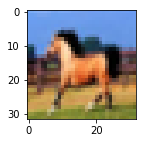

In [46]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
sample = 1902 
each = x_train[sample]

plt.figure(figsize=(2,2))
plt.imshow(each, interpolation='nearest')
print("Image (#{}): Which is label number '{}', or label '{}''".format(sample,y_train[sample], labelNames[y_train[sample][0]]))

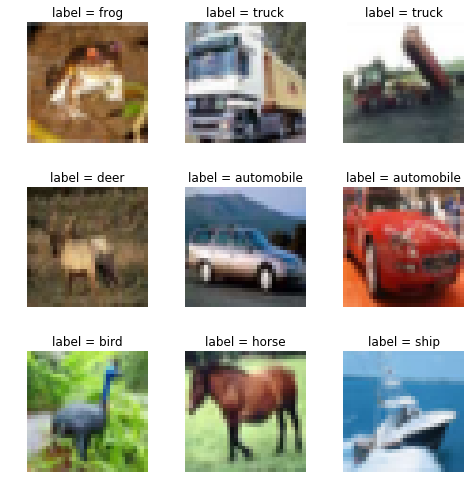

In [47]:
ROW = 3
COLUMN = 3
plt.figure(figsize=(7, 7)) 
for i in range(ROW * COLUMN):
    image = x_train[i] 
    plt.subplot(ROW, COLUMN, i+1)       
    plt.imshow(image, interpolation='nearest')  
    plt.title('label = {}'.format(labelNames[y_train[i][0]]))
    plt.axis('off')
    plt.tight_layout()   
    
plt.show()

In [48]:
#x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
#x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[1], 1)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [50]:
np.amin(x_train)

0

In [28]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [29]:
# One hot encode the outcome
num_classes = 10

# Converts a class vector (integers) to binary class matrix.   One-hot encoding!  Use with categorical_crossentropy.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
y_train.shape

(50000, 10)

In [44]:
checkpointer = ModelCheckpoint(filepath="save/cnn_cifar.hdf5", verbose=0, save_best_only=True) # save best model
input_shape = (32, 32, 3)
weight_decay = 1e-4

#Build network
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay), 
             input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay), 
             input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.34)) 

model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay), 
             input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.36))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')

model.fit(x_train,y_train, validation_data=(x_test,y_test), callbacks=[monitor,checkpointer],verbose=2,epochs=1000, batch_size=64, shuffle=True)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
    
    
print('Training finished...Loading the best model')  
print()
model.load_weights('save/cnn_cifar.hdf5') # load weights from best model

Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
 - 21s - loss: 1.4136 - acc: 0.5251 - val_loss: 1.2506 - val_acc: 0.6086
Epoch 2/1000
 - 18s - loss: 0.9358 - acc: 0.7061 - val_loss: 1.0458 - val_acc: 0.6848
Epoch 3/1000
 - 19s - loss: 0.8043 - acc: 0.7610 - val_loss: 1.0436 - val_acc: 0.6920
Epoch 4/1000
 - 18s - loss: 0.7330 - acc: 0.7961 - val_loss: 1.0360 - val_acc: 0.7202
Epoch 5/1000
 - 18s - loss: 0.6939 - acc: 0.8220 - val_loss: 0.8845 - val_acc: 0.7756
Epoch 6/1000
 - 19s - loss: 0.6778 - acc: 0.8393 - val_loss: 0.7959 - val_acc: 0.8083
Epoch 7/1000
 - 18s - loss: 0.6640 - acc: 0.8545 - val_loss: 0.9418 - val_acc: 0.7767
Epoch 8/1000
 - 18s - loss: 0.6492 - acc: 0.8690 - val_loss: 1.1160 - val_acc: 0.7396
Epoch 9/1000
 - 18s - loss: 0.6461 - acc: 0.8745 - val_loss: 0.8979 - val_acc: 0.8118
Epoch 10/1000
 - 18s - loss: 0.6393 - acc: 0.8842 - val_loss: 0.7944 - val_acc: 0.8405
Epoch 11/1000
 - 18s - loss: 0.6443 - acc: 0.8877 - val_loss: 0.8579 - val_acc: 0.8347
Ep